In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
usps_data = load_digits()


In [ ]:
# labels and features
X = usps_data.data
y = usps_data.target

In [ ]:
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
#  train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
num_classes = 10

mlp_model = MLP(input_size, hidden_size1, hidden_size2, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)




In [ ]:
# MLP model
num_epochs = 50
train_losses = []  # List to store the training losses

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * inputs.size(0)  # Accumulate the loss for the epoch
    epoch_loss /= len(train_loader.dataset)  # Calculate the average epoch loss
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 2.1221
Epoch [2/50], Loss: 1.4791
Epoch [3/50], Loss: 0.7586
Epoch [4/50], Loss: 0.3966
Epoch [5/50], Loss: 0.2499
Epoch [6/50], Loss: 0.1793
Epoch [7/50], Loss: 0.1375
Epoch [8/50], Loss: 0.1110
Epoch [9/50], Loss: 0.0916
Epoch [10/50], Loss: 0.0750
Epoch [11/50], Loss: 0.0615
Epoch [12/50], Loss: 0.0531
Epoch [13/50], Loss: 0.0451
Epoch [14/50], Loss: 0.0376
Epoch [15/50], Loss: 0.0325
Epoch [16/50], Loss: 0.0280
Epoch [17/50], Loss: 0.0243
Epoch [18/50], Loss: 0.0211
Epoch [19/50], Loss: 0.0181
Epoch [20/50], Loss: 0.0159
Epoch [21/50], Loss: 0.0139
Epoch [22/50], Loss: 0.0125
Epoch [23/50], Loss: 0.0110
Epoch [24/50], Loss: 0.0096
Epoch [25/50], Loss: 0.0086
Epoch [26/50], Loss: 0.0077
Epoch [27/50], Loss: 0.0072
Epoch [28/50], Loss: 0.0064
Epoch [29/50], Loss: 0.0057
Epoch [30/50], Loss: 0.0053
Epoch [31/50], Loss: 0.0048
Epoch [32/50], Loss: 0.0044
Epoch [33/50], Loss: 0.0041
Epoch [34/50], Loss: 0.0037
Epoch [35/50], Loss: 0.0035
Epoch [36/50], Loss: 0.0032
E

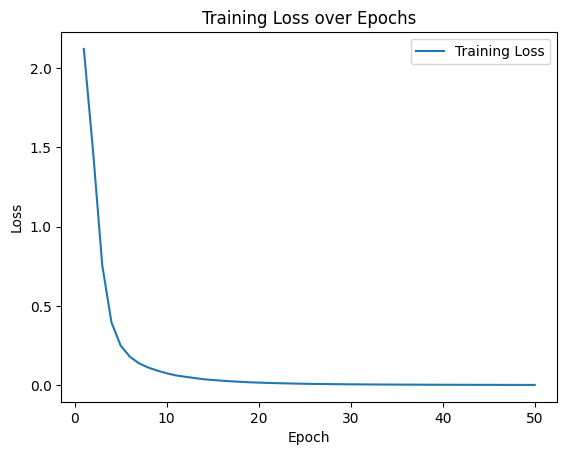

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_predicted = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predicted.extend(predicted.tolist())
            all_labels.extend(labels.tolist())

    accuracy = correct / total
    precision = precision_score(all_labels, all_predicted, average='weighted')
    recall = recall_score(all_labels, all_predicted, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_predicted)

    return accuracy, precision, recall, conf_matrix

# MLP model
mlp_accuracy, mlp_precision, mlp_recall, mlp_conf_matrix = evaluate_model(mlp_model, test_loader)

print("MLP Accuracy:", mlp_accuracy)
print("MLP Precision:", mlp_precision)
print("MLP Recall:", mlp_recall)
print("MLP Confusion Matrix:")
print(mlp_conf_matrix)


MLP Accuracy: 0.9777777777777777
MLP Precision: 0.9780868902439025
MLP Recall: 0.9777777777777777
MLP Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from torch.utils.tensorboard import SummaryWriter


# Define CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, padding=2)  # Ensure input and output size remains the same with padding
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
        self.pool = nn.MaxPool2d(3, 3)    # Reduces the size by half
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 4 * 4, 900)  # Adjusted according to expected output size
        self.fc2 = nn.Linear(900, 10)  # For 10 output classes

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 4 * 4)  # Flatten the tensor for the fully connected layer
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load USPS dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.USPS(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.USPS(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Instantiate the CNN model
cnn_model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Train the CNN model
num_epochs = 50
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.1179
Epoch [2/10], Loss: 0.0755
Epoch [3/10], Loss: 0.0729
Epoch [4/10], Loss: 0.0755
Epoch [5/10], Loss: 0.0021
Epoch [6/10], Loss: 0.0071
Epoch [7/10], Loss: 0.0188
Epoch [8/10], Loss: 0.0019
Epoch [9/10], Loss: 0.0039
Epoch [10/10], Loss: 0.0189


In [34]:
writer = SummaryWriter('runs/usps_experiment')


In [35]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    writer.add_scalar('Training Loss', epoch_loss, epoch)


Epoch [1/10], Loss: 0.0120
Epoch [2/10], Loss: 0.0153
Epoch [3/10], Loss: 0.0096
Epoch [4/10], Loss: 0.0086
Epoch [5/10], Loss: 0.0160
Epoch [6/10], Loss: 0.0121
Epoch [7/10], Loss: 0.0039
Epoch [8/10], Loss: 0.0023
Epoch [9/10], Loss: 0.0015
Epoch [10/10], Loss: 0.0012


In [36]:
def evaluate_and_log_metrics(model, data_loader, phase='Test'):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, _, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    print(f'{phase} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')
    print(f'{phase} Confusion Matrix:\n{conf_matrix}')

    # Log to TensorBoard
    writer.add_scalar(f'{phase} Accuracy', accuracy)
    writer.add_scalar(f'{phase} Precision', precision)
    writer.add_scalar(f'{phase} Recall', recall)
    # For confusion matrix, you might want to log it as an image or use a custom function

evaluate_and_log_metrics(cnn_model, test_loader)


Test Accuracy: 0.9696, Precision: 0.9685, Recall: 0.9659
Test Confusion Matrix:
[[358   0   0   0   0   0   0   1   0   0]
 [  0 260   0   0   3   0   1   0   0   0]
 [  2   1 189   0   2   1   0   1   2   0]
 [  0   0   1 160   0   5   0   0   0   0]
 [  0   2   1   0 190   1   1   1   0   4]
 [  2   0   0   3   0 153   0   0   1   1]
 [  0   1   0   0   4   0 165   0   0   0]
 [  0   1   1   1   4   0   0 140   0   0]
 [  4   0   1   1   0   1   0   0 157   2]
 [  0   0   0   0   0   1   0   1   1 174]]


In [37]:
# This function assumes binary classification or one-vs-all for multiclass classification.
# Adjust accordingly for your specific use case.
def log_precision_recall_curve(model, data_loader):
    model.eval()
    all_labels = []
    all_probs = []
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    for i in range(10):  # Assuming 10 classes
        labels_i = (np.array(all_labels) == i).astype(int)
        probs_i = np.array([prob[i] for prob in all_probs])
        writer.add_pr_curve(f'PR Curve Class {i}', labels_i, probs_i)

log_precision_recall_curve(cnn_model, test_loader)


In [38]:
writer.close()
